In [33]:
#dependecies 
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [4]:
data_df = pd.read_csv("Resources/DataScience_salaries_2024.csv")
data_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [15]:
year_sort_df = data_df.sort_values('work_year')
year_sort_df.reset_index(drop = True)
cleaned_data_df = year_sort_df[['work_year', 'experience_level',	'employment_type',	'job_title',	'salary_in_usd',	'employee_residence',	'remote_ratio',	'company_location',	'company_size']]
cleaned_data_df
bonus_df = cleaned_data_df.rename(columns={"work_year":"Work Year", "experience_level":"Experience Level",
                                    "employment_type":"Employment Type", "job_title":"Job Title",
                                    "salary_in_usd":"Salary (USD)", "employee_residence":"Employee Residence (Country)",
                                    "remote_ratio":"Remote Work Ratio", "company_location":"Location of Company (Country)",
                                   "company_size":"Size of Company"})
bonus_df

,Work Year,Experience Level,Employment Type,Job Title,Salary (USD),Employee Residence (Country),Remote Work Ratio,Location of Company (Country),Size of Company
14834,2020,EX,FT,Staff Data Analyst,15000,NG,0,CA,M
14822,2020,EN,PT,Data Scientist,21669,IT,50,IT,S
3523,2020,SE,FT,Data Science Manager,190200,US,100,US,M
3647,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S
13488,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
...,...,...,...,...,...,...,...,...,...
14827,2024,EN,FT,Big Data Engineer,17600,MX,50,MX,L
14793,2024,EN,FT,Data Analyst,28750,GB,0,GB,M
14792,2024,EN,FT,Data Analyst,28750,GB,0,GB,M
14832,2024,EN,PT,Data Science,16666,DE,50,DE,M


In [32]:
work_year_counts = pd.DataFrame(bonus_df['Work Year'].value_counts())
work_year_counts.sort_index()


,count
Work Year,
2020,75
2021,218
2022,1652
2023,8519
2024,4374


In [21]:
avg_sal_per_year = bonus_df.groupby('Work Year')['Salary (USD)'].mean()
round(avg_sal_per_year)

Work Year
2020    102251.0
2021     99922.0
2022    134404.0
2023    153733.0
2024    151510.0
Name: Salary (USD), dtype: float64

In [45]:
#Avg salary by company size
comp_size = pd.DataFrame(bonus_df.groupby('Size of Company')['Salary (USD)'].mean())
comp_size

,Salary (USD)
Size of Company,
L,139602.460834
M,151450.535396
S,86614.569061


Text(0, 0.5, 'Average Salary (USD)')

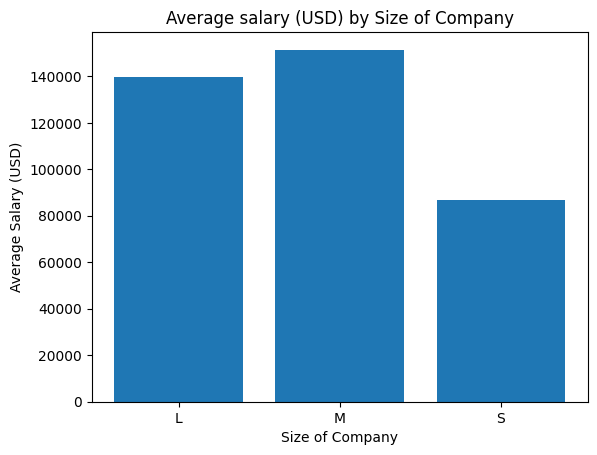

In [82]:
plt.bar(comp_size.index,comp_size['Salary (USD)'])
plt.title('Average salary (USD) by Size of Company')
plt.xlabel('Size of Company')
plt.ylabel('Average Salary (USD)')

In [80]:
comp_loc = pd.DataFrame(bonus_df.groupby('Location of Company (Country)')['Salary (USD)'].mean())
sorted_df = comp_loc.sort_values(by='Salary (USD)',ascending= False)
sorted_df

,Salary (USD)
Location of Company (Country),
QA,300000.000000
IL,217332.000000
PR,167500.000000
US,157410.126474
NZ,147681.666667
...,...
TR,23094.666667
TH,22971.333333
HN,20000.000000


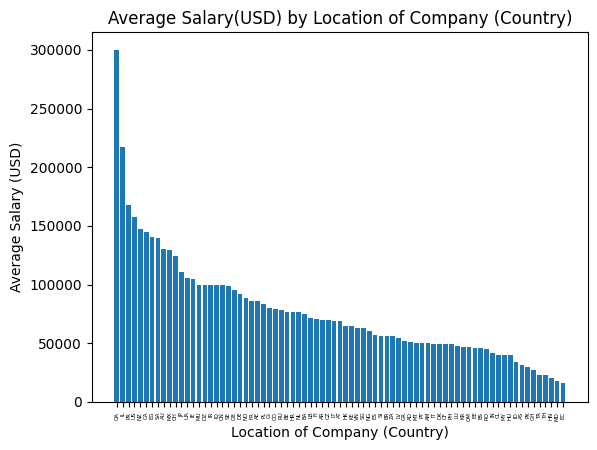

<Figure size 1000x1000 with 0 Axes>

In [87]:
plt.bar(sorted_df.index,sorted_df['Salary (USD)'])
plt.title('Average Salary(USD) by Location of Company (Country)')
plt.xlabel('Location of Company (Country)')
plt.ylabel('Average Salary (USD)')
plt.xticks(fontsize = 4,rotation = 90)
plt.figure(figsize=(10,10))
plt.show()